# Learning D interpolation

**motivation**

when interpolation image data on grids with evenly or unevenly spaced samples `Scipy` offers some function. 

The concept of using `np.meshgrid` must be understood first to create the data grid

an application from tbd is shown


**resources**

1) to start learning to use `meshgrid`:

https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

2) `Scipy` provides interpolation functions for `2D`. A good starting point is:
   
    https://scipython.com/book2/chapter-8-scipy/examples/scipyinterpolateinterp2d/

    but the function `interp2d` is now deprecated. Thus we try to use the recommended function `RegularGridInterpolator`
   
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RegularGridInterpolator.html#scipy.interpolate.RegularGridInterpolator





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator, interp2d

In [2]:
# define a grid in x-direction
Nx = 11
xgrid = np.linspace(-3, 4, Nx)

# define a grid in y-direction
Ny = 5
ygrid = np.linspace(2, 4, Ny)


In [3]:
mg_x, mg_y = np.meshgrid(xgrid, ygrid, indexing='xy')
mg_x_ij, mg_y_ij = np.meshgrid(xgrid, ygrid, indexing='ij')

In [4]:
print(f"mg_x:\n{mg_x}")
print(f"mg_y:\n{mg_y}")
print(f"mg_x[2,3]: {mg_x[2,3]}; mg_y[2,3]: {mg_y[2,3]}")

mg_x:
[[-3.  -2.3 -1.6 -0.9 -0.2  0.5  1.2  1.9  2.6  3.3  4. ]
 [-3.  -2.3 -1.6 -0.9 -0.2  0.5  1.2  1.9  2.6  3.3  4. ]
 [-3.  -2.3 -1.6 -0.9 -0.2  0.5  1.2  1.9  2.6  3.3  4. ]
 [-3.  -2.3 -1.6 -0.9 -0.2  0.5  1.2  1.9  2.6  3.3  4. ]
 [-3.  -2.3 -1.6 -0.9 -0.2  0.5  1.2  1.9  2.6  3.3  4. ]]
mg_y:
[[2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2. ]
 [2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5]
 [3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3. ]
 [3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5]
 [4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4. ]]
mg_x[2,3]: -0.9000000000000004; mg_y[2,3]: 3.0


In [5]:
print(f"mg_x_ij:\n{mg_x_ij}")
print(f"mg_y_ij:\n{mg_y_ij}")
print(f"mg_x_ij[2,3]: {mg_x_ij[2,3]}; mg_y_ij[2,3]: {mg_y_ij[2,3]}")

mg_x_ij:
[[-3.  -3.  -3.  -3.  -3. ]
 [-2.3 -2.3 -2.3 -2.3 -2.3]
 [-1.6 -1.6 -1.6 -1.6 -1.6]
 [-0.9 -0.9 -0.9 -0.9 -0.9]
 [-0.2 -0.2 -0.2 -0.2 -0.2]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 1.2  1.2  1.2  1.2  1.2]
 [ 1.9  1.9  1.9  1.9  1.9]
 [ 2.6  2.6  2.6  2.6  2.6]
 [ 3.3  3.3  3.3  3.3  3.3]
 [ 4.   4.   4.   4.   4. ]]
mg_y_ij:
[[2.  2.5 3.  3.5 4. ]
 [2.  2.5 3.  3.5 4. ]
 [2.  2.5 3.  3.5 4. ]
 [2.  2.5 3.  3.5 4. ]
 [2.  2.5 3.  3.5 4. ]
 [2.  2.5 3.  3.5 4. ]
 [2.  2.5 3.  3.5 4. ]
 [2.  2.5 3.  3.5 4. ]
 [2.  2.5 3.  3.5 4. ]
 [2.  2.5 3.  3.5 4. ]
 [2.  2.5 3.  3.5 4. ]]
mg_x_ij[2,3]: -1.6; mg_y_ij[2,3]: 3.5


## example / meshgrid

from : https://thepythoncodingbook.com/2022/05/28/numpy-meshgrid/

In [6]:

wavelength = 0.5
x = y = np.linspace(-1, 1, 1000)
mgX, mgY = np.meshgrid(x, y)
output = np.sin(2 * np.pi * mgX / wavelength)

Text(0.5, 0, 'x')

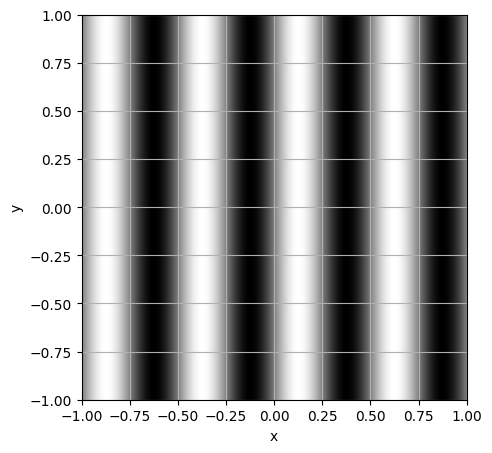

In [7]:
fig1 = plt.figure(1, figsize=[8, 5])
ax_f11 = fig1.add_subplot(1, 1, 1)
ax_f11.imshow(output, cmap="gray", extent=[np.min(x), np.max(x), np.min(y), np.max(y)])
ax_f11.grid(True)
ax_f11.set_ylabel('y')
ax_f11.set_xlabel('x')




## 2D interpolation 

The code has been adapted from

https://scipython.com/book2/chapter-8-scipy/examples/scipyinterpolateinterp2d/

Since interpolation method `interp2d` is marked *deprecated* the code tries to use `RegularGridInterpolator` instead.

The example uses the 2D function 

$$
f(x, y) = sin\left(\frac{\pi \cdot x}{2}\right) \cdot exp\left(\frac{y}{2}  \right)
$$


In [8]:
# from: https://scipython.com/book2/chapter-8-scipy/examples/scipyinterpolateinterp2d/

# grid in x-direction (evenly spaced)
x = np.linspace(0, 4, 13)
# grid in y-direction (non uniform spacing)
y = np.array([0, 2, 3, 3.5, 3.75, 3.875, 3.9375, 4])

# create the grid matrices mgX and mgY
mgX, mgY = np.meshgrid(x, y, sparse=True, indexing='ij')

# values of the function f(x,y)
Z = np.sin(np.pi*mgX/2) * np.exp(mgY/2)

# a new grid (denser spacing) of x, y
# define some grid values outside the the definition range
x2 = np.linspace(-1, 5, 65)
y2 = np.linspace(-0.5, 4.5, 65)

# getting the interpolator
# with deprecated method  interp2d: f = interp2d(x, y, Z, kind='cubic')
# f = RegularGridInterpolator( (mgX, mgY), Z)
# f = interp2d(x, y, Z, kind='linear')
f2_nearest = RegularGridInterpolator( (x, y), Z, method='nearest', bounds_error=False, fill_value=np.nan)
f2_linear = RegularGridInterpolator( (x, y), Z, method='linear', bounds_error=False, fill_value=np.nan)

X2, Y2 = np.meshgrid(x2, y2)
Z2_nearest = f2_nearest( (X2, Y2) )
Z2_linear = f2_linear( (X2, Y2) )

print(f"Z2_nearest.shape : {Z2_nearest.shape}")

Z2_nearest.shape : (65, 65)


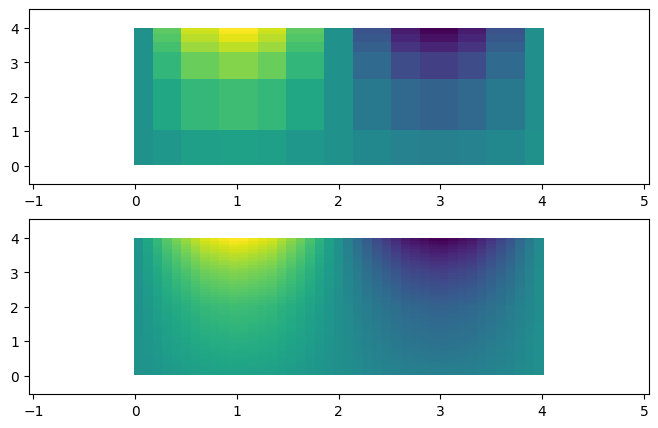

In [9]:
fig2 = plt.figure(2, figsize=[8, 5])
ax_f21 = fig2.add_subplot(2, 1, 1)
ax_f21.pcolormesh(X2, Y2, Z2_nearest)

ax_f22 = fig2.add_subplot(2, 1, 2)
ax_f22.pcolormesh(X2, Y2, Z2_linear)


## Trying to interpolate a Sinogram



### getting the sinogram

In [30]:
# getting the sinogram

fname_sino = './sinograms/sinogram_stripes.npz'
npzData = np.load(fname_sino)
print(f"npzData.files: {npzData.files}")

# get data and initialize filtered sinogram
N_theta = npzData['N_theta']
theta_vec_deg = npzData['theta_vec_deg']
t_vec = npzData['t_vec']
sinogram = npzData['sinogram']
np.nan_to_num(sinogram, copy=False);
print(f"sinogram.shape: {sinogram.shape}")

npzData.files: ['N_theta', 'theta_vec_deg', 't_vec', 'sinogram']
sinogram.shape: (400, 501)


### setting up the interpolator


In [39]:
# setting up the interpolator
interp_sino = RegularGridInterpolator( (theta_vec_deg, t_vec), sinogram, method='linear', bounds_error=False, fill_value=0)

### setting up data to be used to interpolate

1) some data settings are used

2) interpolated data are displayed

In [52]:
# mg_theta_vec_deg, mg_t_vec = np.meshgrid(theta_vec_deg, t_vec)

# the vectors of values to be used for interpolation
vec_theta_i = theta_vec_deg[180:220]
vec_theta_i_line = theta_vec_deg[200]
vec_t_i = t_vec[150:400]

# make 2D data grid for interpolation (cartesian is default for meshgrid)
mg_vec_t_i, mg_vec_theta_i = np.meshgrid(vec_t_i, vec_theta_i)
print(f"mg_vec_t_i.shape: {mg_vec_t_i.shape};  mg_vec_theta_i.shape: {mg_vec_theta_i.shape}")

mg_vec_t_i_line, mg_vec_theta_i_line = np.meshgrid(vec_t_i, vec_theta_i_line)
print(f"mg_vec_t_i_line.shape: {mg_vec_t_i_line.shape};  mg_vec_theta_i_line.shape: {mg_vec_theta_i_line.shape}")

# do interpolation
sinogram_i = interp_sino( (mg_vec_theta_i, mg_vec_t_i) )
print(f"sinogram_i.shape: {sinogram_i.shape}")

sinogram_i_line = interp_sino( (mg_vec_theta_i_line, mg_vec_t_i) )
print(f"sinogram_i_line.shape: {sinogram_i_line.shape}")

mg_vec_t_i.shape: (40, 250);  mg_vec_theta_i.shape: (40, 250)
mg_vec_t_i_line.shape: (1, 250);  mg_vec_theta_i_line.shape: (1, 250)
sinogram_i.shape: (40, 250)
sinogram_i_line.shape: (1, 250)


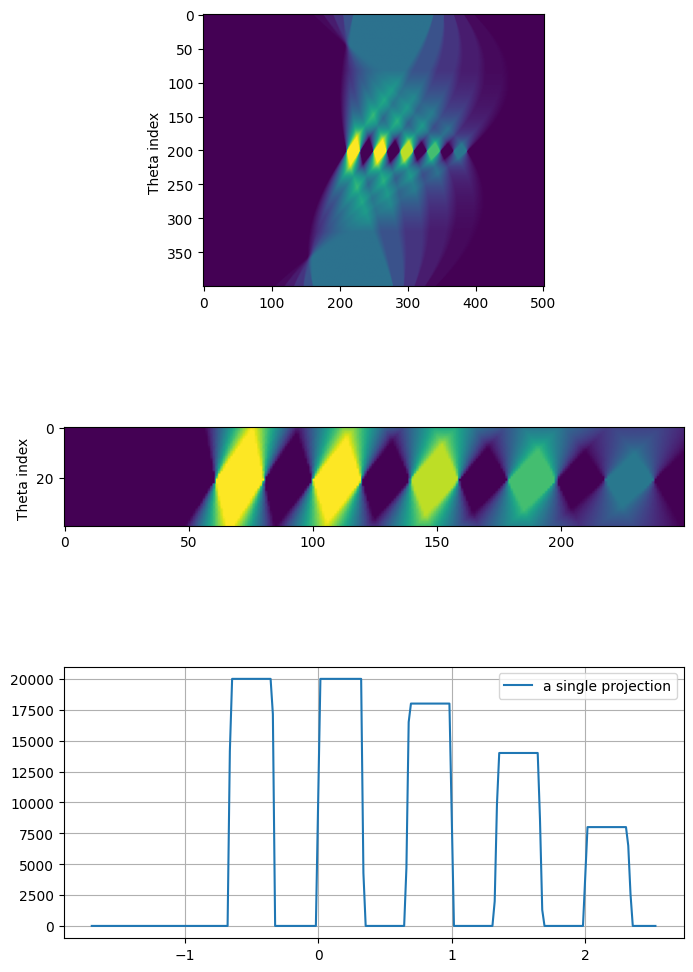

In [56]:
fig3 = plt.figure(3, figsize=[8, 12])

ax_f31 = fig3.add_subplot(3, 1, 1)
# plot of sinogram
ax_f31.imshow(sinogram)
ax_f31.set_ylabel('Theta index ')

# and here the interpolated part of the sinogram
ax_f32 = fig3.add_subplot(3, 1, 2)
# plot of sinogram
ax_f32.imshow(sinogram_i)
ax_f32.set_ylabel('Theta index ')

ax_f33 = fig3.add_subplot(3, 1, 3)
# plot of a single projection from sinogram
ax_f33.plot(vec_t_i, sinogram_i_line[0,:], label='a single projection')
ax_f33.grid(True)
ax_f33.legend();

---

Some applications require to do interpolation along a vector . 

Examples: A vector of $N$ values in $x$ direction and another vector of $N$ values in $y$ direction are interpreted as a sequence of $N$ $(x,\ y)$ tuples. For this sequence a interpolated sequence, again with $N$ values shall be computed.

The examples below show how that can be accomplished with `RegularGridInterpolator`.

In [70]:
# the interpolation shall be done along coordinate vectors 
# angle_vec (constant angle)
# t variable 
# the interpolated values should have same length as the coordinate vectors

angle_vec = np.zeros(len(vec_t_i)) + 89.0
sinogram_vec = interp_sino( (angle_vec, vec_t_i) )
print(f"sinogram_vec.shape: {sinogram_vec.shape}")

sinogram_vec.shape: (250,)


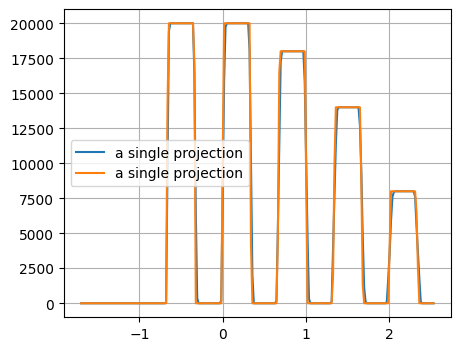

In [72]:
fig4 = plt.figure(4, figsize=[5, 4])

ax_f41 = fig4.add_subplot(1, 1, 1)
ax_f41.plot(vec_t_i, sinogram_vec, label='a single projection')
ax_f41.plot(vec_t_i, sinogram_i_line[0,:], label='a single projection')
ax_f41.grid(True)
ax_f41.legend();

In [74]:
# the interpolation shall be done along coordinate vectors 
# angle_vec (ascending angle)
# t variable 
# the interpolated values should have same length as the coordinate vectors

angle_vec2 = np.linspace(70.0, 110, len(vec_t_i))
sinogram_vec2 = interp_sino( (angle_vec2, vec_t_i) )
print(f"sinogram_vec2.shape: {sinogram_vec2.shape}")

sinogram_vec2.shape: (250,)


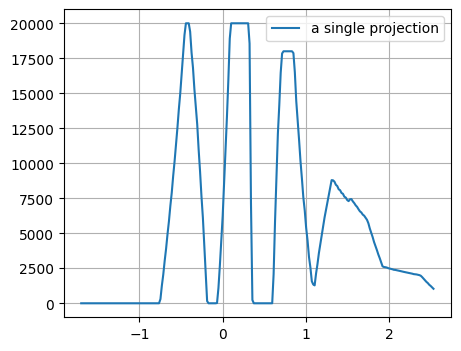

In [77]:
fig5 = plt.figure(5, figsize=[5, 4])

ax_f51 = fig5.add_subplot(1, 1, 1)
ax_f51.plot(vec_t_i, sinogram_vec2, label='a single projection')
ax_f51.grid(True)
ax_f51.legend()